In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [70]:
dataset=pd.read_csv('Crop_recommendation.csv')

In [71]:
dataset.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1580,33,143,204,21.131608,91.957699,5.814435,122.539195,apple
1281,35,125,204,19.649177,80.152158,6.107742,73.695296,grapes
1558,32,145,203,23.830537,90.844222,6.406819,109.596679,apple
932,21,23,42,19.541281,90.297518,6.902751,104.373988,pomegranate
2035,78,50,43,25.124177,85.725306,6.348441,159.571809,jute


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [73]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [74]:
dataset['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [75]:
crops=dataset['label'].unique()

In [76]:
crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [77]:
crop=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

In [78]:
pd.DataFrame(crops)

,0
0,rice
1,maize
2,chickpea
3,kidneybeans
4,pigeonpeas
5,mothbeans
6,mungbean
7,blackgram
8,lentil
9,pomegranate


In [79]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [80]:
dataset['label']=encoder.fit_transform(dataset['label'])

In [81]:
dataset['N']=dataset['N']/140
dataset['P']=dataset['P']/145
dataset['K']=dataset['K']/205

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [83]:
dataset['temperature']=scaler.fit_transform(dataset[['temperature']])
dataset['humidity']=scaler.fit_transform(dataset[['humidity']])
dataset['ph']=scaler.fit_transform(dataset[['ph']])
dataset['rainfall']=scaler.fit_transform(dataset[['rainfall']])

In [84]:
dataset.sample(3)

,N,P,K,temperature,humidity,ph,rainfall,label
1125,0.085714,0.255172,0.146341,0.639088,0.386753,0.162000,0.251752,12
882,0.100000,0.510345,0.073171,0.550196,0.598649,0.464717,0.106805,10
1836,0.171429,0.096552,0.160976,0.589818,0.921769,0.444995,0.712462,4


In [85]:
cm=dataset.corr()

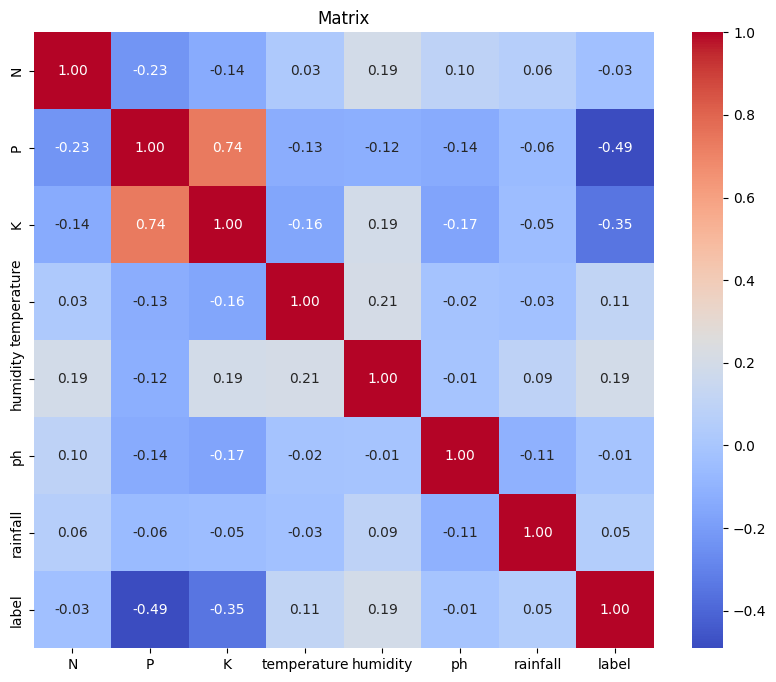

In [86]:
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.title("Matrix")
plt.show()

In [87]:
correlation = dataset.corr()
target_correlation = correlation["label"].sort_values(ascending=False)
print(target_correlation)

label          1.000000
humidity       0.193911
temperature    0.113606
rainfall       0.045611
ph            -0.012253
N             -0.031130
K             -0.346417
P             -0.491006
Name: label, dtype: float64


In [88]:
X=dataset.drop('label', axis='columns')
y=dataset['label']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.33) 

In [90]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()

In [91]:
model1.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
pred1=model1.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error, r2_score
def accuracy(value):
    mae = mean_absolute_error(y_test, value)
    print("Mean Absolute Error:", mae)
    r2 = r2_score(y_test, value)
    print("R² Score:", r2)

In [94]:
r21 = r2_score(y_test, pred1)

In [95]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [96]:
model2.fit(X_train, y_train)

LinearRegression()

In [97]:
pred2=model2.predict(X_test)

In [98]:
accuracy(pred1)

Mean Absolute Error: 0.4614876033057851
R² Score: 0.9473955832420498


In [99]:
accuracy(pred2)

Mean Absolute Error: 4.176695743172249
R² Score: 0.2834965637921397


In [100]:
def fun(z):
    answer=model1.predict([z])
    if(answer-(round(answer)>0.5)):
        x=np.ceil(answer)
        y=int(x)
        print("model1 : ", crops[y])
    else:
        answer2=model2.predict([z])
        x2=np.floor(answer2)
        y2=int(x2)
        print("model2 : ", crops[y2])

In [101]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()

In [102]:
model3.fit(X_train, y_train)

LogisticRegression()

In [103]:
pred3=model3.predict(X_test)

In [104]:
accuracy(pred3)

Mean Absolute Error: 0.5027548209366391
R² Score: 0.869616001820454


In [105]:
from sklearn.tree import DecisionTreeRegressor
model4=DecisionTreeRegressor()

In [106]:
model4.fit(X_train, y_train)

DecisionTreeRegressor()

In [107]:
pred4=model4.predict(X_test)

In [108]:
accuracy(pred4)

Mean Absolute Error: 0.3347107438016529
R² Score: 0.8966421826814812


In [109]:
from sklearn.ensemble import AdaBoostRegressor
model5=AdaBoostRegressor()

In [110]:
model5.fit(X_train, y_train)

AdaBoostRegressor()

In [111]:
pred5=model5.predict(X_test)

In [112]:
accuracy(pred5)

Mean Absolute Error: 3.2395135881208215
R² Score: 0.6690143079932401


In [113]:
from sklearn.ensemble import  GradientBoostingRegressor
model6=GradientBoostingRegressor()

In [114]:
model6.fit(X_train, y_train)

GradientBoostingRegressor()

In [115]:
pred6=model6.predict(X_test)

In [116]:
accuracy(pred6)

Mean Absolute Error: 1.3580100615454045
R² Score: 0.8921455965059838


In [117]:
r21 = r2_score(y_test, pred1)
r22 = r2_score(y_test, pred2)
r23 = r2_score(y_test, pred3)
r24 = r2_score(y_test, pred4)
r25 = r2_score(y_test, pred5)
r26 = r2_score(y_test, pred6)


(0.0, 5.0)

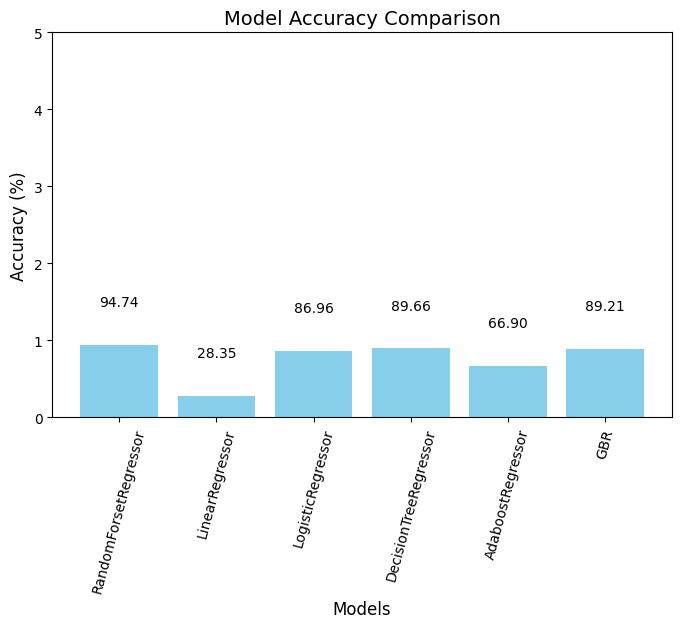

In [118]:
accuracies = [r21, r22, r23, r24, r25, r26]
model_names = ['RandomForsetRegressor', 'LinearRegressor', 'LogisticRegressor', 'DecisionTreeRegressor', 'AdaboostRegressor', 'GBR']
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.xticks(rotation=75)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f"{acc*100:.2f}", ha='center', fontsize=10)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0, 5) 


In [121]:
import joblib
joblib.dump(model1, 'model.pkl')

['model.pkl']

In [122]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [123]:
13/140

0.09285714285714286

In [124]:
17/145

0.11724137931034483

In [125]:
45/210

0.21428571428571427

In [133]:
t=scaler.fit_transform([[106.27]])